In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,f1_score, accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfTickets = pd.read_csv('all_tickets.csv')
dfTickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [3]:
dfTickets.shape

(48549, 9)

In [4]:
dfTickets.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


In [5]:
dfTickets.isnull()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
48544,False,False,False,False,False,False,False,False,False
48545,False,False,False,False,False,False,False,False,False
48546,False,False,False,False,False,False,False,False,False
48547,False,False,False,False,False,False,False,False,False


In [6]:
dfTickets.isnull().sum()

title               712
body                  0
ticket_type           0
category              0
sub_category1         0
sub_category2         0
business_service      0
urgency               0
impact                0
dtype: int64

<AxesSubplot:>

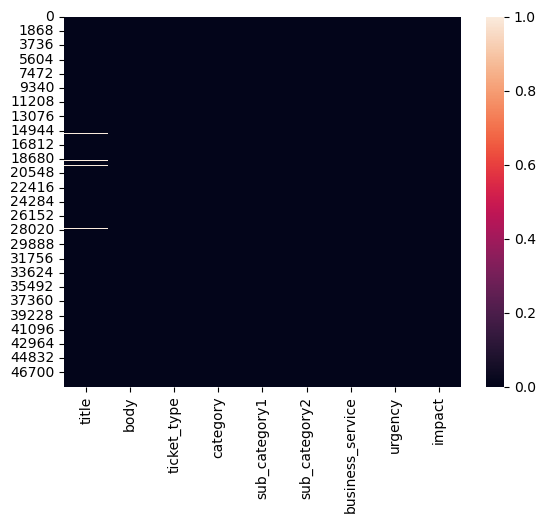

In [7]:
sns.heatmap(dfTickets.isnull())

In [8]:
dfTickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             47837 non-null  object
 1   body              48549 non-null  object
 2   ticket_type       48549 non-null  int64 
 3   category          48549 non-null  int64 
 4   sub_category1     48549 non-null  int64 
 5   sub_category2     48549 non-null  int64 
 6   business_service  48549 non-null  int64 
 7   urgency           48549 non-null  int64 
 8   impact            48549 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.3+ MB


In [9]:
newdf = dfTickets.select_dtypes([np.number])
newdf.columns.values

array(['ticket_type', 'category', 'sub_category1', 'sub_category2',
       'business_service', 'urgency', 'impact'], dtype=object)

In [10]:
dfTickets['ticket_type'].value_counts()

1    34621
0    13928
Name: ticket_type, dtype: int64

In [11]:
dfTickets['category'].value_counts()

4     34061
5      9634
6      2628
7       921
11      612
8       239
9       191
3       137
1        72
12       45
0         4
2         3
10        2
Name: category, dtype: int64

In [12]:
dfTickets['sub_category1'].value_counts()

2     9857
3     8324
1     7857
13    6487
21    5710
51    2402
22    1475
15    1226
9     1114
12     624
14     620
32     559
39     354
30     222
54     217
50     204
36     177
45     176
56     147
10     114
35      83
27      79
28      60
49      57
41      54
37      48
16      42
58      34
17      27
53      26
57      25
8       15
55      13
24      12
34      11
33      10
19       8
44       8
43       7
4        7
18       6
26       6
20       6
38       5
52       4
0        4
40       4
6        3
31       3
42       3
46       2
23       2
48       2
7        2
11       1
29       1
25       1
5        1
47       1
Name: sub_category1, dtype: int64

In [13]:
len(dfTickets['sub_category1'].value_counts())

59

In [14]:
dfTickets['sub_category1'].nunique()

59

In [15]:
dfTickets['sub_category2'].value_counts()

7     18197
21     6581
41     3232
0      2705
88     2243
      ...  
42        1
31        1
37        1
28        1
56        1
Name: sub_category2, Length: 115, dtype: int64

In [16]:
len(dfTickets['sub_category2'].value_counts())

115

In [17]:
y = dfTickets['ticket_type']
X= dfTickets['body']

In [18]:
X.shape

(48549,)

In [19]:
y.shape

(48549,)

In [20]:
type(X)

pandas.core.series.Series

In [21]:
type(y)

pandas.core.series.Series

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [23]:
X_train.shape

(29129,)

In [24]:
X_test.shape

(19420,)

In [25]:
y_train.shape

(29129,)

In [26]:
y_test.shape

(19420,)

In [27]:
X_train.head()

27120    tuesday november pm maternity leaver form hell...
38261    error hello please be aware had recovery error...
37829    error when attempting access hi please escalat...
31054    tuesday needed today hi today presentation aft...
15808    pm addresses hi please addresses corresponding...
Name: body, dtype: object

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)

In [29]:
type(X_train_cv)

scipy.sparse._csr.csr_matrix

In [30]:
X_train_cv.shape

(29129, 10712)

## checking what data is there in sparse matrix

In [31]:
# convert the sparse matrix to a dense array and create a DataFrame
df_cv = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names_out())
df_cv.head()

,ab,abandon,abandoned,abbott,abbreviations,abc,abeam,abilities,ability,able,...,zion,zip,zipped,zipper,zn,zone,zones,zoom,zooming,zori
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_cv,y_train)

LogisticRegression()

In [33]:
X_test_cv = cv.transform(X_test)
y_test_pred = log_reg.predict(X_test_cv)

In [34]:
accuracy_score(y_test,y_test_pred)

0.994335736354274

In [35]:
f1_score(y_test,y_test_pred)

0.996033177064551

In [97]:
X_test[37118]

'rom re suspicious dear thank you for prompt reaction after did open ticked got complains our users regarding please block following domains addresses well list domains list ne face well have mention beginning with october we got lot seems work or work we got hosts meet basic rules hosts with records with wrong we got indicate or be correct based but compliant we got existent domains ne filter drop such we got hosts blacklisted more than informed regarding issue told ask you open ticket'

In [99]:
p1 = log_reg.predict(cv.transform([X_test[37118]]))
print(p1)

[0]


## Pickling the Model file for Deployment

In [79]:
import pickle

In [80]:
pickle.dump(log_reg,open('logreg.pkl','wb'))

In [81]:
pickle_model = pickle.load(open('logreg.pkl','rb'))

In [100]:
print(pickle_model.predict(cv.transform([X_test[37118]])))

[0]
